In [91]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [ ]:
def draw_from_csv(dfs):
    
    # Create figure and axis with specific size
    fig, ax = plt.subplots(figsize=(12, 6))

    for name, dataframe in dfs.items():
        #dataframe.drop(columns=['Unnamed: 0'], inplace=True)
        dataframe = dataframe.drop(dataframe.index[0])
        dataframe['Source Value'] = dataframe['Source Value'].str.replace(',', '.').astype(float)
        dataframe['Reading'] = dataframe['Reading'].str.replace(',', '.').astype(float)
        print(f"\nFichier: {name}")
        print(dataframe.head())
        ax.plot(dataframe['Source Value'], dataframe['Reading'], label=f'Reading from {name}', alpha=0.7)

    # Customize the plot
    ax.set_title('Evolution of Reading over Source Value')
    ax.set_xlabel('Source Value')
    ax.set_ylabel('Reading')
    ax.grid(True, linestyle='--', alpha=0.6)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add legend
    ax.legend()

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    #Save figure 
    plt.savefig(f"../output/all-file.png")

    
    # Show the plot
    plt.show()


In [93]:
def load_csv_from_folder(folder_path):
    """Charge tous les fichiers CSV d'un dossier en DataFrames pandas"""
    csv_files = {}
    folder = Path(folder_path)
    
    for csv_file in folder.glob('*.csv'):
        print(csv_file)
        csv_files[csv_file.stem] = pd.read_csv(csv_file, delimiter=";", skiprows=45, parse_dates=['Timestamp'])
            
    return csv_files

..\data\chemistry\84_amb1_2.5.csv
..\data\chemistry\84_amb2_2.1.csv

Fichier: 84_amb1_2.5
   Unnamed: 0 Timestamp  Source Value   Reading
1         1.0       0.0     -2.000000 -0.000047
2         2.0  0.099888     -1.959596 -0.000041
3         3.0  0.199889     -1.919192 -0.000040
4         4.0  0.299889     -1.878788 -0.000039
5         5.0  0.399888     -1.838384 -0.000039

Fichier: 84_amb2_2.1
   Unnamed: 0 Timestamp  Source Value   Reading
1         1.0       0.0     -0.700000 -0.000016
2         2.0  0.499888     -0.685859 -0.000014
3         3.0  0.999888     -0.671717 -0.000014
4         4.0  1.499888     -0.657576 -0.000013
5         5.0  1.999888     -0.643434 -0.000013


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24516\3705260692.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  csv_files[csv_file.stem] = pd.read_csv(csv_file, delimiter=";", skiprows=45, parse_dates=['Timestamp'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24516\3705260692.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  csv_files[csv_file.stem] = pd.read_csv(csv_file, delimiter=";", skiprows=45, parse_dates=['Timestamp'])


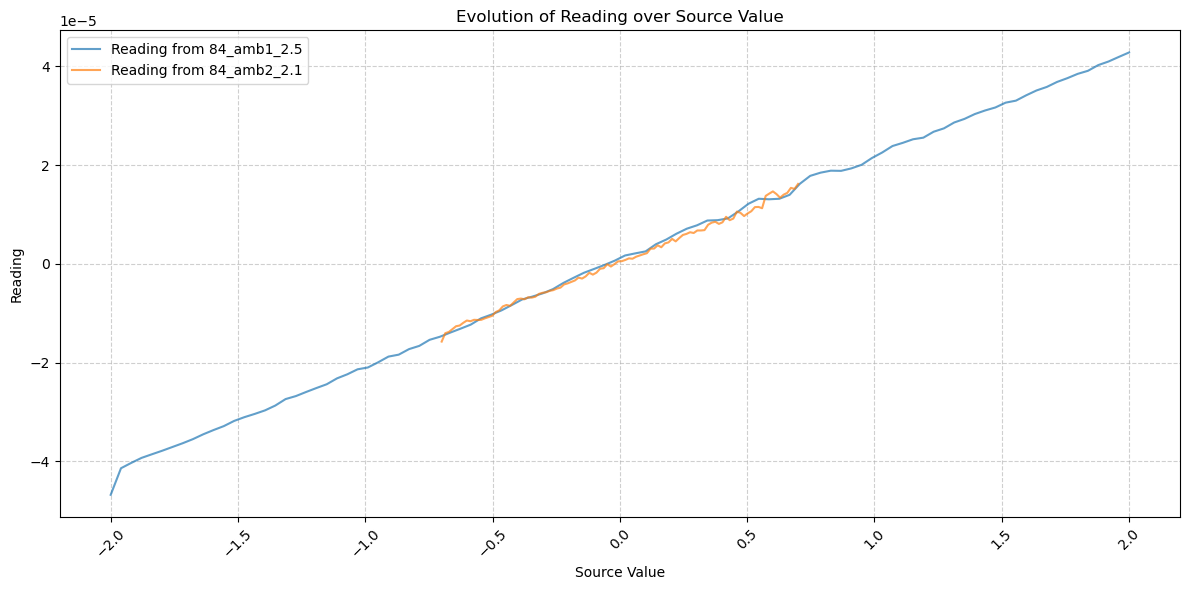

In [94]:
folder_path = "../data/chemistry/"  # À modifier selon votre dossier
dfs = load_csv_from_folder(folder_path)
draw_from_csv(dfs)



In [95]:
type(dfs.items())


dict_items

In [96]:
# Afficher les DataFrames chargés
for name, df in dfs.items():
    print(f"\nFichier: {name}")
    print(df.head())


Fichier: 84_amb1_2.5
   Unnamed: 0  Timestamp Source Value       Reading
0         NaN  (seconds)      (Volts)        (Amps)
1         1.0        0.0         -2.0  -4.678965E-5
2         2.0   0.099888    -1.959596  -4.140139E-5
3         3.0   0.199889    -1.919192  -4.031658E-5
4         4.0   0.299889    -1.878788   -3.93033E-5

Fichier: 84_amb2_2.1
   Unnamed: 0  Timestamp Source Value       Reading
0         NaN  (seconds)      (Volts)        (Amps)
1         1.0        0.0         -0.7  -1.574755E-5
2         2.0   0.499888   -0.6858586  -1.404285E-5
3         3.0   0.999888   -0.6717172  -1.379252E-5
4         4.0   1.499888   -0.6575758  -1.322031E-5
